# Generowanie liczb pseudolosowych z rozkładów innych niż jednorodny

Proszę zaprogramować generator zmiennych losowych z rozkładu normalnego N(0,1), korzystając z generatora liczb pseudolosowych rozkładu jednorodnego U(0,1).
Można korzystać z dowolnej metody (centralne twierdzenie graniczne, algorytm Boksa-Muellera, metoda odrzucania, itp.).

Proszę narysować histogram losowanych liczb (można spróbować różny "binning", czyli szerokość pudełek, ale sugeruję https://en.wikipedia.org/wiki/Histogram#Scott's_normal_reference_rule) i porównać dystrybuantę z dystrybuantą teoretyczną.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Algorytm Boksa-Muellera

Generowanie zmiennych losowych z rozładu normalnego używająć współrzędnych biegunowych:

$$ x = r\cos(\theta) $$
$$ y = r\sin(\theta) $$

Gdzie kąt i promień wyliczamy używająć zmiennych losowych z rozkładu jednorodnego:

$$ r = \sqrt{-2\log(u_1)} $$
$$ \theta = 2\pi u_2 $$

In [2]:
def generate_box_mueller(size):
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)
    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    
    X = r * np.cos(theta)
    Y = r * np.sin(theta)
    
    return X

In [3]:
size = 10000

generated_numbers = generate_box_mueller(size)
mean = np.mean(generated_numbers)
var = np.var(generated_numbers)
std = np.std(generated_numbers)

In [4]:
print(f"Średnia: [{mean}], wariancja: [{var}], odchylenie standardowe: [{std}]")

Średnia: [0.0047350538840131825], wariancja: [1.023020351432308], odchylenie standardowe: [1.0114446853052854]


## Reguła Scotta dla binów

Szerokość bina podana jest jako:

$$ h={\frac {3.49{\sigma}}{\sqrt[{3}]{n}}} $$

gdzie $\sigma$ jest odchyleniem standardowym a $n$ ilością wylosowanych próbek.

In [5]:
bin_width = (3.49 * std) / (np.cbrt(size))
bins_num = int((np.max(generated_numbers) - np.min(generated_numbers)) / bin_width)

In [6]:
x = np.linspace(np.min(generated_numbers), np.max(generated_numbers), 100)
pdf = np.exp(-0.5*(x**2))/np.sqrt(2*np.pi)

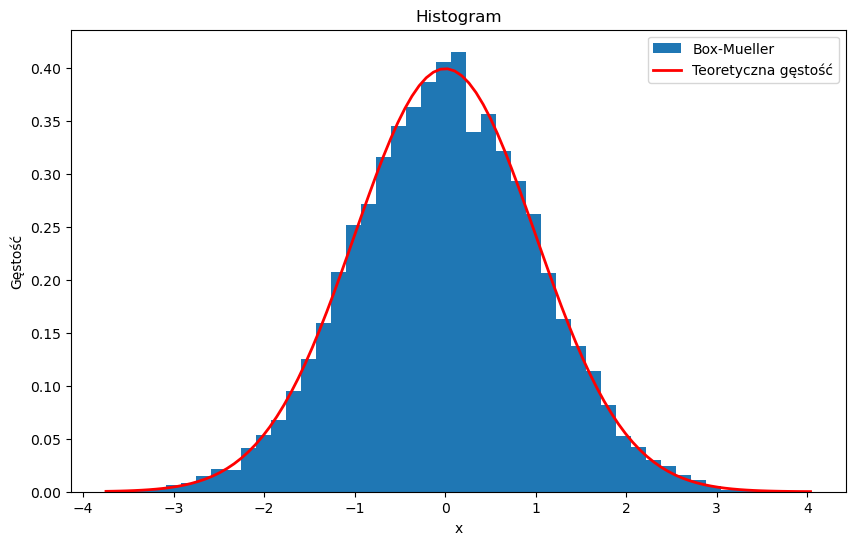

In [7]:
plt.figure(figsize=(10,6))
plt.hist(generated_numbers, bins=bins_num, density=True, label='Box-Mueller')
plt.plot(x, pdf, 'r', linewidth=2, label='Teoretyczna gęstość')

plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('Gęstość')
plt.legend()
plt.show()

In [8]:
x = np.linspace(np.min(generated_numbers), np.max(generated_numbers), 100)
cdf_theoretical = norm.cdf(x, loc=0, scale=1)

In [9]:
sorted_numbers = np.sort(generated_numbers)
proportion = np.arange(len(generated_numbers)) / (len(generated_numbers) - 1)

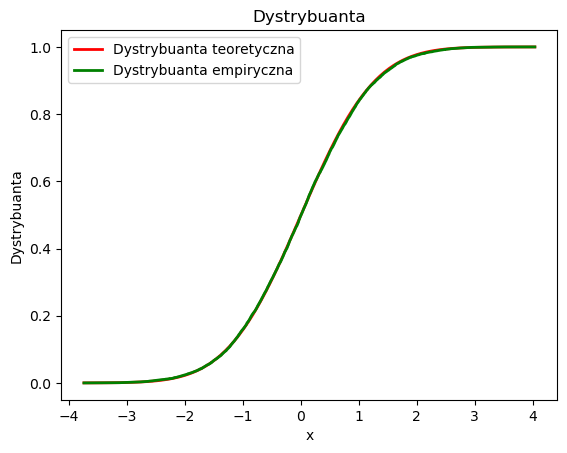

In [10]:
plt.plot(x, cdf_theoretical, 'r', linewidth=2, label='Dystrybuanta teoretyczna')
plt.plot(sorted_numbers, proportion, 'g', linewidth=2, label='Dystrybuanta empiryczna')

plt.title('Dystrybuanta')
plt.xlabel('x')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.show()

Dystrybuanta empiryczna jest przybliżeniem dystrybuanty teoretycznej. Im więcej obserwacji tym dystrybuanta empiryczna jest bliższa teoretycznej.